In [4]:
import numpy as np
from sklearn.metrics import f1_score, confusion_matrix, recall_score, precision_score, roc_auc_score, accuracy_score
import seaborn as sbn
import matplotlib.pyplot as plt
import pickle

### Metrics on Predicate Detection

TP: 1641  
FN: 401 
FP_v: 401
F_det: 358 
precision= 0.683750 
recall= 0.803624
f1-score = 0.738856
accuracy = 0.585862
[[   0  358]
 [ 401 1641]]


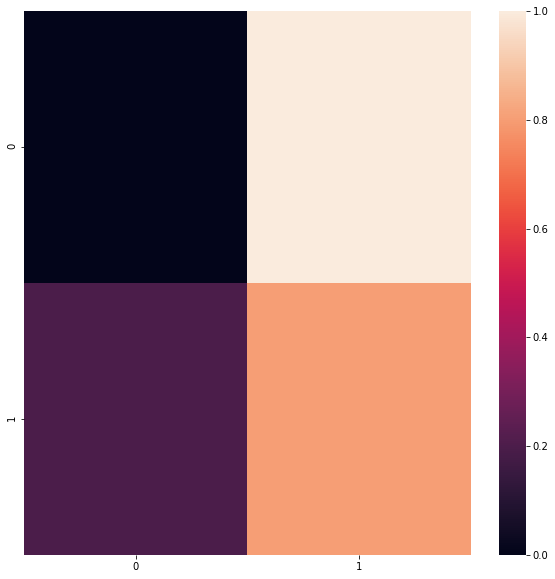

In [9]:
predicate_detection_eval = np.load("./predictions_actual/predicate_detection_eval.npy")
predicate_real_pos = np.load("./predictions_actual/predicate_real_pos_eval.npy")
final_mask = (predicate_real_pos==1) | (predicate_detection_eval == 1)

y_true, y_pre = predicate_real_pos[final_mask].flatten(), predicate_detection_eval[final_mask].flatten()


TP,FN , F_det, FP_v = 0,0,0,0
for i,j in zip(y_pre, y_true):
    if i==j and i!= 0:
        TP += 1
    if j!=0 and i==0:
        FN +=1
    if (i!=0 and j==0):
        F_det +=1
    if (j!=0 and i!=j):
        FP_v += 1
        
print("TP: %d  \nFN: %d \nFP_v: %d\nF_det: %d " % (TP, FN, FP_v, F_det))

FP = F_det + FP_v

precision = TP/(TP+FP)
recall = TP/(TP+FN)

print("precision= %f \nrecall= %f"%(precision, recall))


f1 = 2*(precision*recall)/(precision+recall)

print("f1-score = %f"%(f1))


accuracy = TP/(TP + FN + FP)
print("accuracy = %f" % (accuracy))


cm = confusion_matrix(y_true, y_pre)
print(cm)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10,10))
sbn.heatmap(cm)

## Metrics for Predicate Disambiguation

TP: 1417  
FN: 307 
FP_v: 742
F_det: 63 
precision= 0.637714 
recall= 0.821926
f1-score = 0.718196
accuracy = 0.560301


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:37: RuntimeWarning: invalid value encountered in true_divide


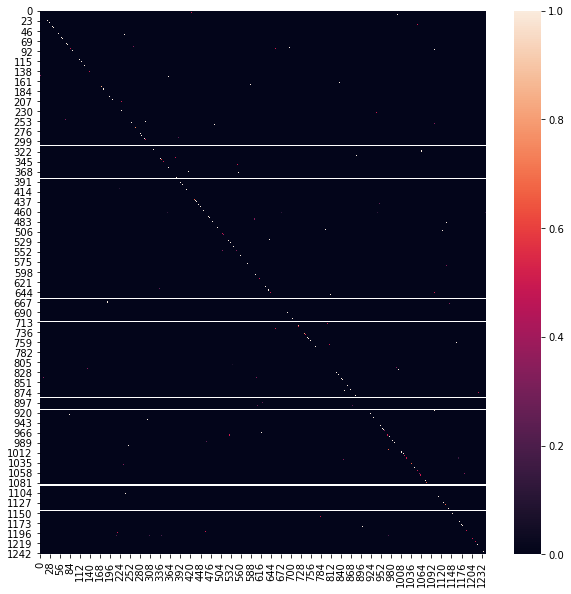

In [11]:
predicate_disambiguation_eval = np.load("./predictions_actual/predicate_disambiguation_eval.npy")
predicate_real_sense_eval = np.load("./predictions_actual/predicate_real_sense_eval.npy")

y_true, y_pre = predicate_disambiguation_eval[final_mask], predicate_real_sense_eval[final_mask]

TP,FN , F_det, FP_v = 0,0,0,0
for i,j in zip(y_pre, y_true):
    if i==j and i!= 0:
        TP += 1
    if j!=0 and i==0:
        FN +=1
    if (i!=0 and j==0):
        F_det +=1
    if (j!=0 and i!=j):
        FP_v += 1
        
print("TP: %d  \nFN: %d \nFP_v: %d\nF_det: %d " % (TP, FN, FP_v, F_det))

FP = F_det + FP_v

precision = TP/(TP+FP)
recall = TP/(TP+FN)

print("precision= %f \nrecall= %f"%(precision, recall))


f1 = 2*(precision*recall)/(precision+recall)

print("f1-score = %f"%(f1))


accuracy = TP/(TP + FN + FP)
print("accuracy = %f" % (accuracy))


cm = confusion_matrix(y_true, y_pre)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10,10))
sbn.heatmap(cm)